# 1.Problem Statement

In this project we need to predict the price of the house based on the features

# 2.Import the required libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 3. Load the dataset

In [210]:
df=pd.read_csv('BostonHousing.csv')

In [211]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 4 Basic Checks

In [212]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [214]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.1 check null values

In [215]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [216]:
# there is no null values in the dataset

## 4.2 check duplicate values

In [217]:
df.duplicated().sum()

0

In [218]:
# there is no duplicate values

## 4.3 datatypes

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 4.4 Check no of unique values in a dataset

In [220]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

## 4.5 Check statistics of an dataset

In [221]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Insights
- There are 14 columns and 506 rows
- 14 columns are numerical

## 4.6 exploring the data


In [222]:

for i in df.columns:
    if df[i].nunique()<10:
        print(i)
        print('categories in {} are'.format(i),df[i].unique())

chas
categories in chas are [0 1]
rad
categories in rad are [ 1  2  3  5  4  8  6  7 24]


## 4.7 seperating categorical and numerical feature

In [223]:
## In this dataset the there is not categorical values

In [224]:
numerical_col=[x for x in df.columns if df[x].dtypes!='o']

In [225]:
len(numerical_col)

14

In [226]:
df.shape

(506, 14)

## Exploratory Data Analysis

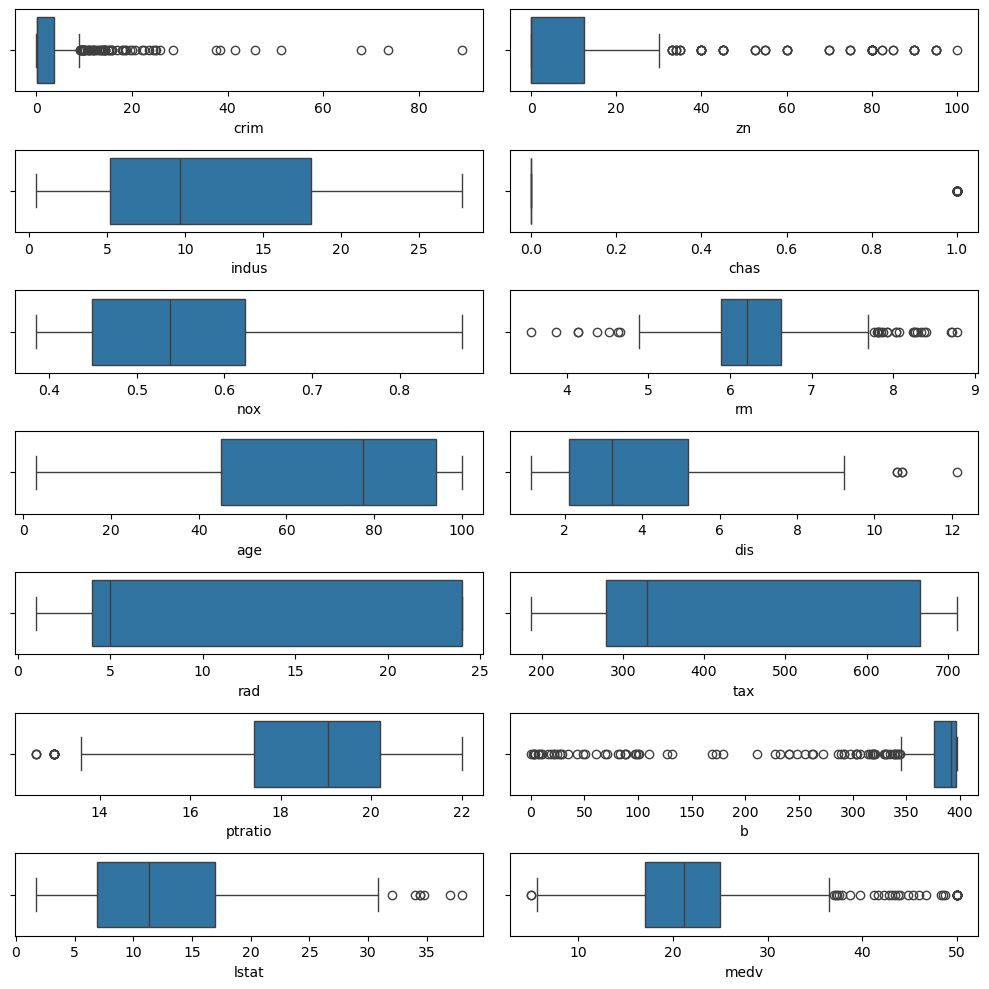

In [227]:
plt.figure(figsize=(10,10))
plot=1
for i in df.columns:
    if plot<15:
        axis=plt.subplot(7,2,plot)
        sns.boxplot(x=df[i])
        plot=plot+1
        
plt.tight_layout()


In [228]:
oulier_columns=['crim','zn','rm','b','medv']


In [229]:
def outlier(col):
    for i in col:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-0.5*iqr
        upper=q3+0.5*iqr
        df.loc[df[i]<lower,i]=df[i].median()
        df.loc[df[i]>upper,i]=df[i].median()

In [230]:
outlier(oulier_columns)

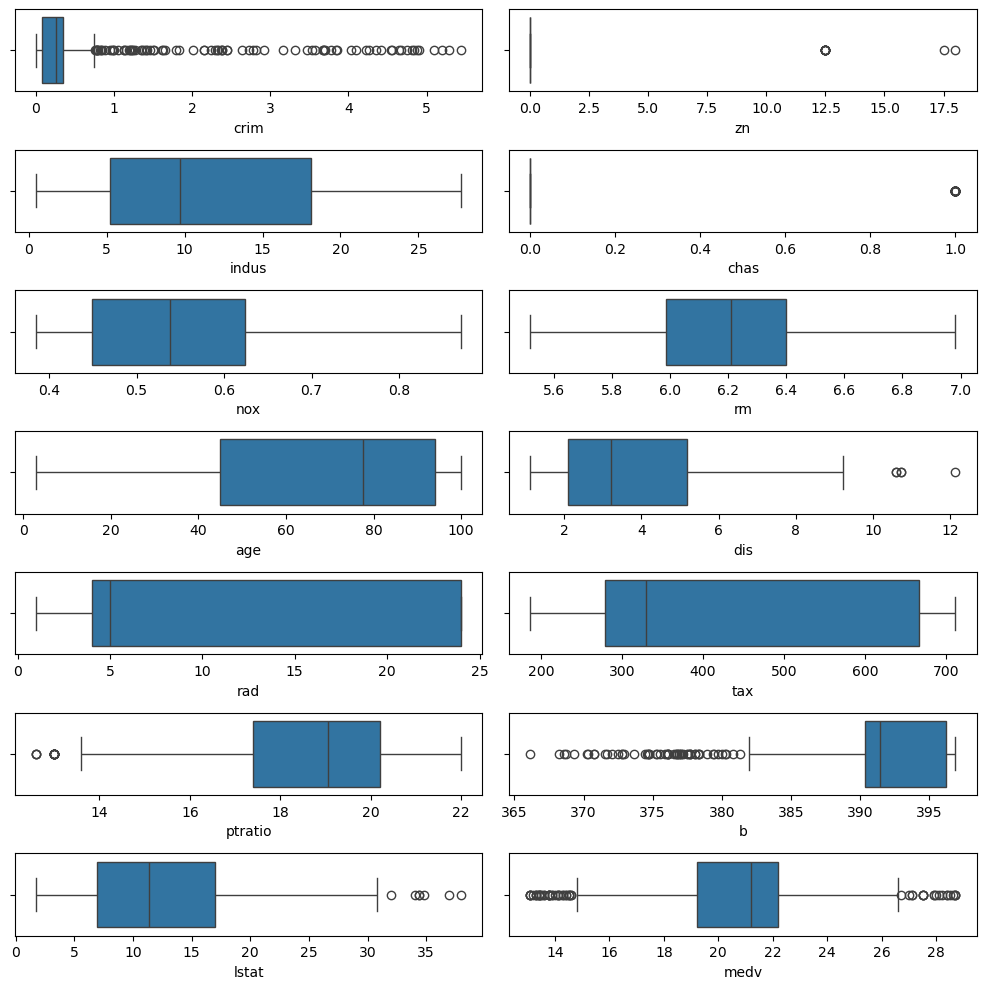

In [231]:
plt.figure(figsize=(10,10))
plot=1
for i in df.columns:
    if plot<15:
        axis=plt.subplot(7,2,plot)
        sns.boxplot(x=df[i])
        plot=plot+1
        
plt.tight_layout()

In [232]:
df.loc[df['crim']==df['crim'].median()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


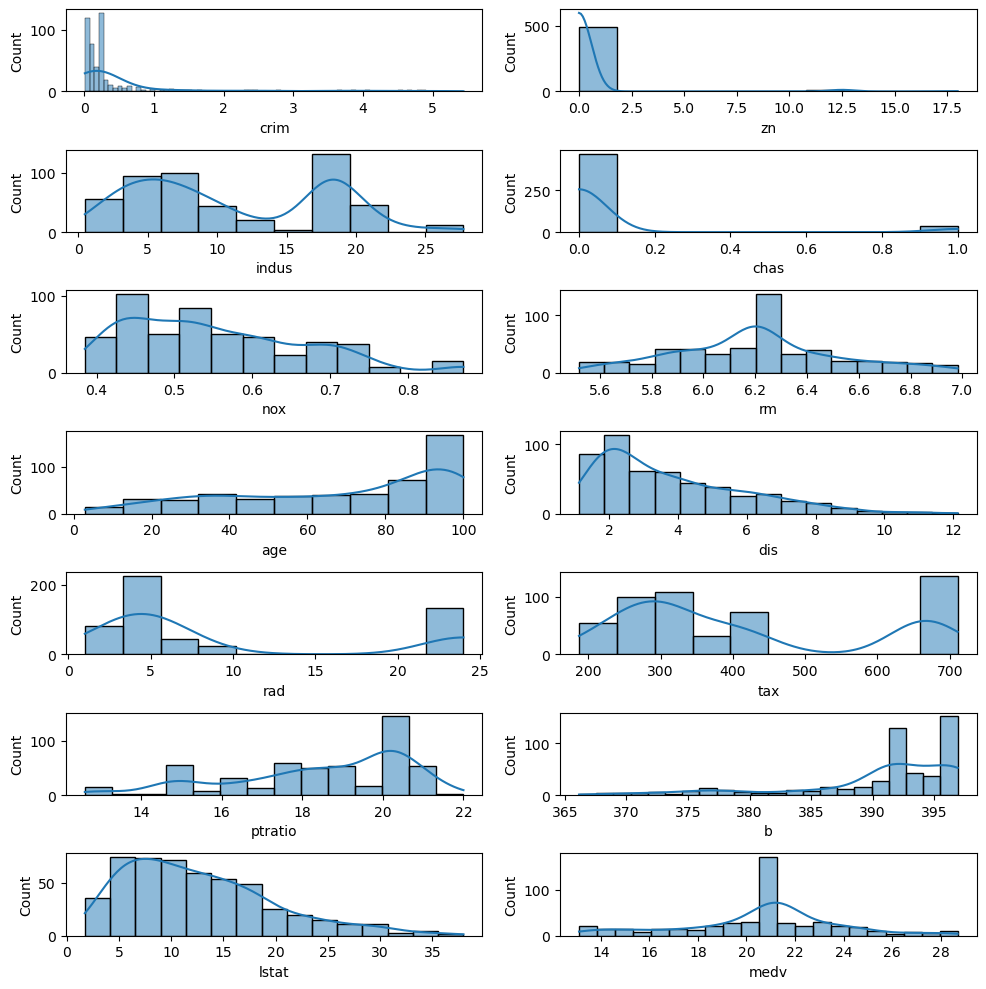

In [233]:
plt.figure(figsize=(10, 10))
plot = 1

for i in df.columns:
    if plot < 15:
        axis = plt.subplot(7, 2, plot)
        sns.histplot(df[i], kde=True, ax=axis)  # Use sns.histplot and pass the axis
        plot += 1

plt.tight_layout()
plt.show()

## Feature Engineeering

In [234]:
x=df.drop('medv',axis=1)
y=df.medv
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [235]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.57500,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.42100,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,6.20875,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.20875,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,6.20875,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.59300,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.12000,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.97600,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.79400,89.3,2.3889,1,273,21.0,393.45,6.48


Balancing datasets- it is an regression model

In [236]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
select=SelectKBest(mutual_info_regression,k=12)
x_train=select.fit_transform(x_train,y_train)
x_test=select.transform(x_test)

In [237]:
selected_features = x.columns[select.get_support()]
x_train=pd.DataFrame(x_train,columns=selected_features)
x_test=pd.DataFrame(x_test,columns=selected_features)

In [238]:
x_train

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.03359,2.95,0.0,0.428,6.20875,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
1,0.25651,18.10,0.0,0.659,6.20850,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
2,4.34879,18.10,0.0,0.580,6.16700,84.0,3.0334,24.0,666.0,20.2,396.90,16.29
3,2.30040,19.58,0.0,0.605,6.31900,96.1,2.1000,5.0,403.0,14.7,391.44,11.10
4,0.52014,3.97,0.0,0.647,6.20875,91.5,2.2885,5.0,264.0,13.0,386.86,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.29819,6.20,0.0,0.504,6.20875,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
400,0.25651,18.10,0.0,0.700,5.53600,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
401,0.12329,10.01,0.0,0.547,5.91300,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
402,0.32264,21.89,0.0,0.624,5.94200,93.5,1.9669,4.0,437.0,21.2,378.25,16.90


In [239]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
min_max=MinMaxScaler()
x_test

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.14231,10.01,0.0,0.547,6.25400,84.2,2.2565,6.0,432.0,17.8,388.74,10.45
1,0.14150,6.91,0.0,0.448,6.16900,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
2,1.20742,19.58,0.0,0.605,5.87500,94.6,2.4259,5.0,403.0,14.7,391.44,14.43
3,0.25651,18.10,0.0,0.740,6.40600,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
4,0.40202,9.90,0.0,0.544,6.38200,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.25651,18.10,0.0,0.740,6.48500,100.0,1.9784,24.0,666.0,20.2,386.73,18.85
98,0.79041,9.90,0.0,0.544,6.12200,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
99,2.01019,19.58,0.0,0.605,6.20875,96.2,2.0459,5.0,403.0,14.7,369.30,3.70
100,0.34109,7.38,0.0,0.493,6.41500,40.1,4.7211,5.0,287.0,19.6,396.90,6.12


In [240]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [241]:
x_train=pd.DataFrame(x_train,columns=selected_features)
x_test=pd.DataFrame(x_test,columns=selected_features)

In [242]:
x_train

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.502880,-1.178065,-0.262265,-1.104928,0.021317,-1.901003,0.738102,-0.730430,-0.909993,-0.073147,0.682512,-1.506086
1,-0.289839,1.004794,-0.262265,0.922534,0.020545,1.092767,-1.241314,1.708361,1.555452,0.802796,-3.285144,1.465990
2,3.621097,1.004794,-0.262265,0.229159,-0.107601,0.523880,-0.371693,1.708361,1.555452,0.802796,0.882457,0.485038
3,1.663479,1.218037,-0.262265,0.448582,0.361752,0.954101,-0.809199,-0.498164,-0.010761,-1.732830,0.029567,-0.237110
4,-0.037891,-1.031100,-0.262265,0.817211,0.021317,0.790546,-0.720845,-0.498164,-0.838531,-2.516569,-0.685861,-0.959258
...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.250006,-0.709795,-0.262265,-0.437884,0.021317,-1.858337,-0.211531,-0.149765,-0.582458,-0.488068,-2.146395,-1.236151
400,-0.289839,1.004794,-0.262265,1.282386,-2.056031,1.092767,-1.052747,1.708361,1.555452,0.802796,0.882457,1.502167
401,-0.417155,-0.160838,-0.262265,-0.060478,-0.891913,0.840324,-0.690425,-0.382031,0.161940,-0.303659,0.577854,0.473906
402,-0.226639,1.550869,-0.262265,0.615342,-0.802366,0.861657,-0.871586,-0.614297,0.191716,1.263819,-2.030802,0.569915


In [243]:
x_test

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.398978,-0.160838,-0.262265,-0.060478,0.161042,0.530991,-0.735844,-0.382031,0.161940,-0.303659,-0.392192,-0.327552
1,-0.399752,-0.607496,-0.262265,-0.929390,-0.101425,-2.228113,0.887999,-0.730430,-1.023141,-0.257557,-1.231023,-0.973172
2,0.618933,1.218037,-0.262265,0.448582,-1.009251,0.900768,-0.656442,-0.498164,-0.010761,-1.732830,0.029567,0.226233
3,-0.289839,1.004794,-0.262265,1.633461,0.630394,0.993212,-0.825557,1.708361,1.555452,0.802796,-0.826447,0.934467
4,-0.150777,-0.176687,-0.262265,-0.086809,0.556286,-0.073452,-0.137754,-0.614297,-0.600323,-0.027045,0.618467,-0.340075
...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.289839,1.004794,-0.262265,1.633461,0.874334,1.092767,-0.866196,1.708361,1.555452,0.802796,-0.706167,0.841242
98,0.220402,-0.176687,-0.262265,-0.086809,-0.246554,-0.585451,-0.555948,-0.614297,-0.600323,-0.027045,0.882457,-0.949518
99,1.386129,1.218037,-0.262265,0.448582,0.021317,0.957657,-0.834557,-0.498164,-0.010761,-1.732830,-3.428854,-1.266762
100,-0.209007,-0.539777,-0.262265,-0.534430,0.658185,-1.037005,0.419370,-0.498164,-0.701562,0.526182,0.882457,-0.930038


## Model building

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [246]:
pred=linear.predict(x_test)

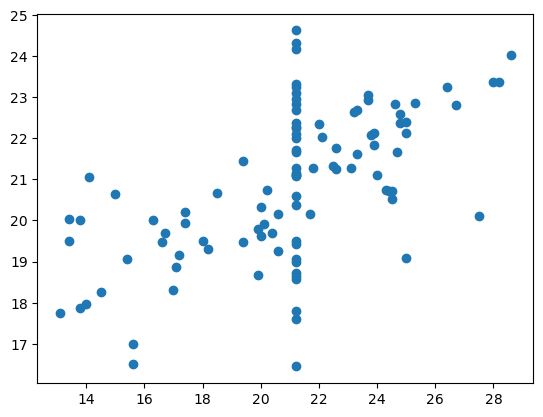

In [247]:
plt.scatter(y_test,pred)

In [248]:
residuals=y_test-pred
residuals

114   -2.175147
42     2.430784
170   -2.527089
441   -1.778395
318    1.834711
         ...   
443   -3.662766
311    0.057276
166    0.117266
324    2.610116
174    1.337431
Name: medv, Length: 102, dtype: float64

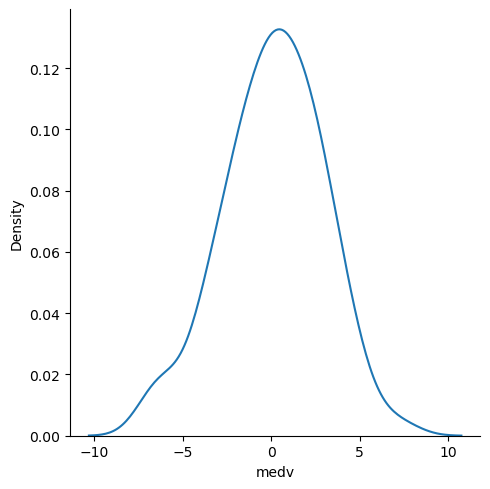

In [249]:
sns.displot(residuals,kind='kde')

In [250]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [251]:
print('mae is ',mean_absolute_error(y_test,pred))
print('mse is ',mean_squared_error(y_test,pred))
print('rmse is ',np.sqrt(mean_absolute_error(y_test,pred)))

mae is  2.24208457239472
mse is  7.930769008572876
rmse is  1.4973591995225193


In [264]:
r2=r2_score(y_test,pred)

In [265]:
#Adjusted r2 score
n=len(y_test)
k=x_test.shape[1]
k

12

In [267]:
adjusted_r2=1-(1-r2)*(n-1)/(n-k-1)

In [268]:
adjusted_r2

0.24974817898296442

## Prediciton of new data

In [274]:
new_x_train=np.array(x_train)

In [286]:
new_x_train[1].reshape(1,-1)

array([[-0.28983893,  1.00479398, -0.26226526,  0.9225335 ,  0.02054487,
         1.09276745, -1.2413144 ,  1.70836058,  1.55545193,  0.80279608,
        -3.28514381,  1.46599004]])

In [297]:
linear.predict(new_x_train[403].reshape(1,-1))

array([18.43575541])

In [299]:
y_train

40     21.2
406    21.2
470    19.9
168    23.8
262    21.2
       ... 
228    21.2
382    21.2
112    18.8
136    17.4
415    21.2
Name: medv, Length: 404, dtype: float64

## Pickling the model for deploymeny

In [300]:
from sklearn.feature_selection import VarianceThreshold

In [219]:
variance=VarianceThreshold(threshold=0.3)

In [220]:
variance.fit(df)

VarianceThreshold(threshold=0.3)

In [221]:
variance.get_support()
data=df.copy()

In [222]:
variance_col=[x for x in data.columns if x not in data.columns[variance.get_support()]  ]

In [223]:
variance_col

['chas', 'nox', 'rm']

In [213]:
data.columns[variance.get_support()]

Index(['crim', 'zn', 'indus', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b',
       'lstat', 'medv'],
      dtype='object')

In [227]:
#data.drop(variance_col,axis=1,inplace=True)
x=df.drop('medv',axis=1)
y=df['medv']

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [230]:
from sklearn.feature_selection import mutual_info_regression
feature=mutual_info_regression(x_train,y_train)

In [231]:
feature

array([0.1530522 , 0.01515425, 0.25694737, 0.01195305, 0.22932812,
       0.24039113, 0.18513765, 0.11359977, 0.25347763, 0.24336453,
       0.07317581, 0.4338992 ])

In [232]:
from sklearn.feature_selection import SelectKBest

In [348]:
sele_cols=SelectKBest(mutual_info_regression,k=10)
sele_cols.fit(x_train,y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x14681cb80>)

In [234]:
x_train.columns[sele_cols.get_support()]

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [301]:
import pickle

In [302]:
pickle.dump(linear,open('regression_model','wb'))

In [304]:
pickeled=pickle.load(open('regression_model','rb'))

In [305]:
pickeled.predict(new_x_train[403].reshape(1,-1))

array([18.43575541])